In [2]:
import numpy as np

In [9]:
# Data Loading

import struct

# Paths to your MNIST files
images_path = 'data/FashionMNIST/raw/t10k-images-idx3-ubyte'
labels_path = 'data/FashionMNIST/raw/t10k-labels-idx1-ubyte'

# Load images
with open(images_path, 'rb') as f:
    magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
    image_data = f.read()
    images = np.frombuffer(image_data, dtype=np.uint8).reshape((num_images, rows, cols))

# Load labels
with open(labels_path, 'rb') as f:
    magic, num_labels = struct.unpack('>II', f.read(8))
    label_data = f.read()
    labels = np.frombuffer(label_data, dtype=np.uint8)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (10000, 28, 28)
Labels shape: (10000,)


In [ ]:
# Data splitting

import math
intersection = math.floor(len(images) / 100 * 80)
X_train = images[:intersection]
y_train = images[intersection:]
X_label = labels[:intersection]
y_label = labels[intersection:]


# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [5]:
# Hyper parameters

input_size = 28 * 28
hidden_size = 64
output_size = 10
learning_rate = 0.01
num_epochs = 5
batch_size = 32

Text(0.5, 1.0, 'class Ankle Boot')

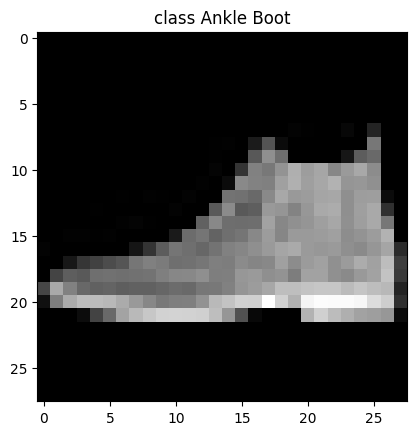

In [20]:
# Data sample

import matplotlib.pyplot as plt
plt.imshow(images[0], cmap="gray")
plt.title(f"class {classes[labels[0]]}")

In [44]:
# Training

bias = 0.01
W1 = np.random.rand(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W1 = np.random.rand(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

for epoch in range(num_epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train = X_train[permutation]
    y_train = y_train[permutation]

    

In [48]:
permutation = np.random.permutation(X_train.shape[0])
permutation

array([3609, 4579, 5194, ..., 1335, 5115, 4643], shape=(8000,))

In [51]:
X_train.shape[0]

8000